# **Spectrogram using Python**

In [ ]:
audio_file_path = r'/content/drive/MyDrive/Audio/Spectrogram/sarigamapa.wav'

In [ ]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(16, 4))

In [ ]:
sampling_frequency, wav_data = scipy.io.wavfile.read(audio_file_path)

def convert_wav_to_float(data):
    if data.dtype == np.uint8:
        data = (data - 128) / 128.
    elif data.dtype == np.int16:
        data = data / 32768.
    elif data.dtype == np.int32:
        data = data / 2147483648.
    return data

wav_data = convert_wav_to_float(wav_data)

In [ ]:
n_samples = len(wav_data)
total_duration = n_samples / sampling_frequency
sample_times = np.linspace(0, total_duration, n_samples)

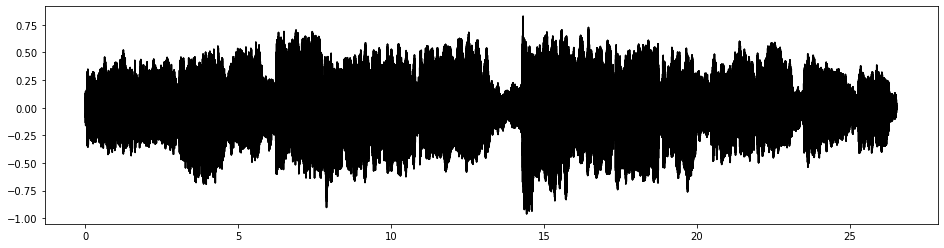

In [ ]:
plt.plot(sample_times, wav_data, color='k');

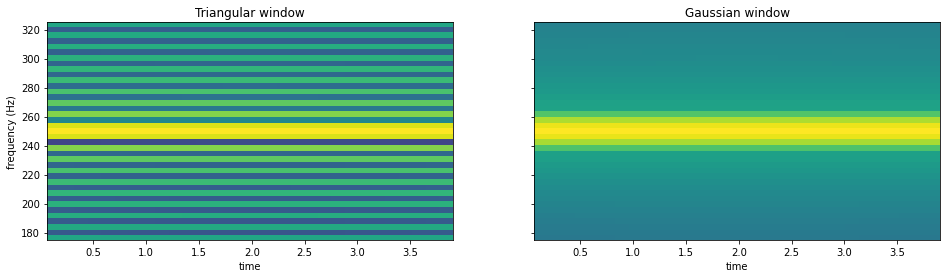

In [ ]:
duration = 4
sine_frequency = 250
time = np.linspace(0, duration, 1000 * duration)
sine_wave = np.sin(2 * np.pi * sine_frequency * time)

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
kwargs = dict(x=sine_wave, Fs=1000, NFFT=256, noverlap=128)
axs[0].specgram(window=np.bartlett(256), **kwargs)
axs[1].specgram(window=scipy.signal.gaussian(256, int(256 / 6)), **kwargs)
axs[0].set_ylim(175, 325)
axs[0].set_ylabel('frequency (Hz)')
axs[0].set_xlabel('time')
axs[1].set_xlabel('time')
axs[0].set_title('Triangular window')
axs[1].set_title('Gaussian window');

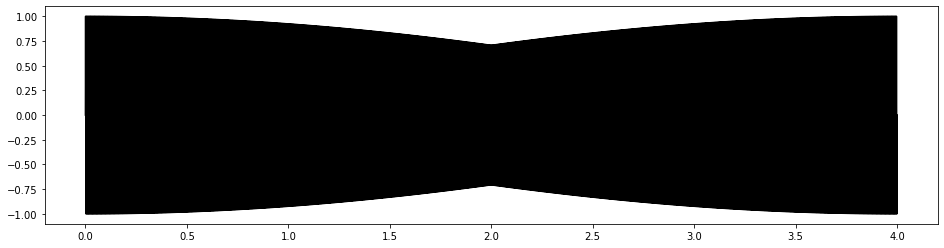

In [ ]:
plt.plot(time, sine_wave, color='k');

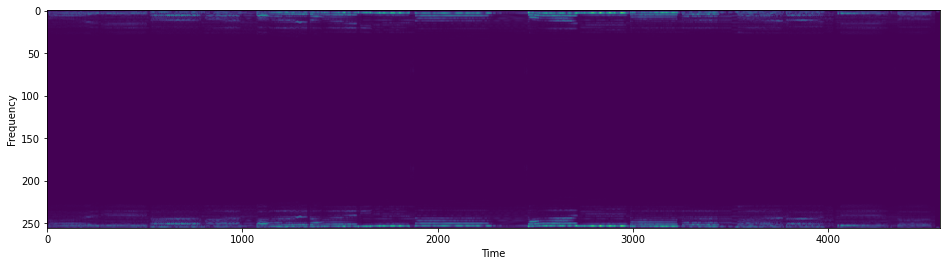

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# read wav file
audio_file_path = r'sarigamapa.wav'
fs, data = wavfile.read(audio_file_path)
data = data[:,0]

# create window function
window_size = 256 
window = np.hanning(window_size)

# create spectrogram
spectrogram = np.zeros((int(len(data)/window_size),window_size))
for i in range(spectrogram.shape[0]):
    segment = data[i*window_size:(i+1)*window_size]
    segment = segment*window
    fft_data = np.fft.fft(segment)
    fft_data = np.abs(fft_data)
    spectrogram[i,:] = fft_data[:window_size]

# plot spectrogram
plt.imshow(spectrogram.T, aspect='auto')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()